In [91]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import copy
from PIL import Image

In [92]:
blind1_img = cv2.imread('Corneal_scar_d1.PNG')
blind2_img = cv2.imread('Corneal scar_d2.jpg')
blind3_img = cv2.imread('Corneal scar_d3.jpg')
blind4_img = cv2.imread('Corneal scar_d4.jpg')
blind5_img = cv2.imread('Corneal scar_d5.jpg')
blind6_img = cv2.imread('Corneal scar_d6.jpg')
blind7_img = cv2.imread('Corneal scar_d7.jpg')
blind8_img = cv2.imread('Corneal scar_d8.jpg')
blind9_img = cv2.imread('Corneal scar_d9.png')
blind10_img = cv2.imread('Corneal scar_d10.PNG')
blind11_img = cv2.imread('Corneal scar_d11.PNG')

In [93]:
blind_img = blind9_img

In [160]:
blind_img = cv2.imread('Corneal scar_d6.jpg')
output = blind_img.copy()

In [161]:
rgb_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2RGB)
gray_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2GRAY)
hsv_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2HSV)

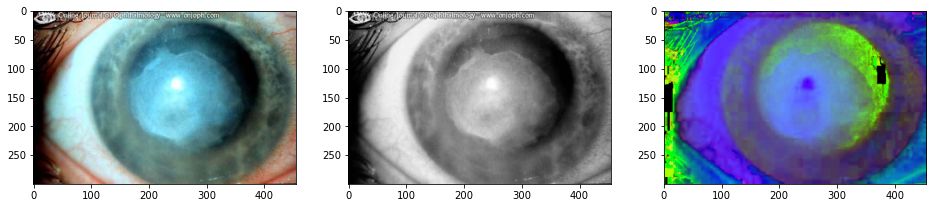

In [162]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 9)
axs[0].imshow(rgb_b)
axs[1].imshow(gray_b, cmap='gray', vmin=0, vmax=255)
axs[2].imshow(hsv_b, cmap='hsv')

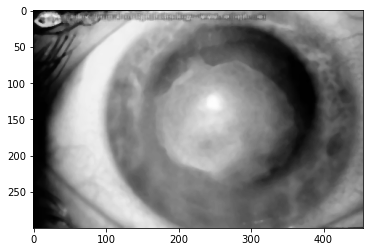

In [163]:
gray_blurred = cv2.medianBlur(gray_b, 5)
plt.imshow(gray_blurred, cmap='gray', vmin=0, vmax=255)

In [164]:
def detect_circles(hsv_img):
    
    detected_circles = None
    acc_threshold = 30
    while(detected_circles is None):
        
        detected_circles = cv2.HoughCircles(hsv_img[:,:,0],
                                 cv2.HOUGH_GRADIENT, 1, gray_b.shape[1], param1 = 50,
                                 param2 = acc_threshold, minRadius = int(gray_b.shape[0]/5), maxRadius = 0)
        acc_threshold -= 1
        
    return acc_threshold, detected_circles

In [165]:
gray_b.shape[1]

455

In [166]:
def detect_circles(hsv_img):
    
    detected_circles = cv2.HoughCircles(hsv_img[:,:,0],
                                 cv2.HOUGH_GRADIENT, 1, gray_b.shape[0], param1 = 50,
                                 param2 = 30, minRadius = 0, maxRadius = 0)
    return detected_circles

In [167]:
def draw_circles(detected_circles, rgb):
    if detected_circles is not None:

        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))
        cir_img = rgb.copy()

        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]

            # Draw the circumference of the circle.
            cv2.circle(cir_img, (a, b), r, (0, 255, 0), 2)
            
    return cir_img

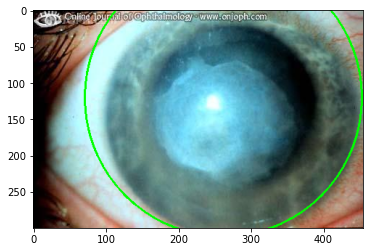

In [168]:
circles = detect_circles(hsv_b)
circle_image = draw_circles(circles, rgb_b)
plt.imshow(circle_image)

In [103]:
circles


array([[[592.5, 397.5, 391.1]]], dtype=float32)

In [15]:
circles = cv2.HoughCircles(hsv_b[:,:,0], cv2.HOUGH_GRADIENT, 1, 75, param1=15, param2=30, minRadius=0,maxRadius=400)
circles

array([[[ 566.5,  340.5,  305.9],
        [ 506.5,  292.5,  283.9],
        [ 506.5,  386.5,  237.7],
        [ 581.5,  421.5,  246.5],
        [ 429.5,  391.5,  199.2],
        [ 511.5,  461.5,  211.3],
        [ 650.5,  300.5,  230. ],
        [ 659.5,  387.5,  204.7],
        [1018.5,  396.5,  395. ],
        [ 150.5,  436.5,  297.1],
        [  36.5,  454.5,  360.9],
        [ 667.5,  149.5,  147.5],
        [ 980.5,  489.5,  299.3],
        [  75.5,  386.5,  340. ],
        [ 442.5,  138.5,  117.8],
        [ 223.5,  461.5,  239.9],
        [ 721.5,  337.5,  147.5],
        [ 110.5,  522.5,  305.9],
        [ 891.5,  514.5,  283.9],
        [  49.5,  632.5,  377.4],
        [1062.5,  312.5,  311.4],
        [ 145.5,  653.5,  382.9],
        [1090.5,  430.5,  399.4],
        [ 873.5,  591.5,  282.8],
        [ 596.5,  178.5,  120. ],
        [1034.5,  637.5,  399.4],
        [1006.5,  566.5,  347.7],
        [   1.5,  371.5,  371.9],
        [ 909.5,  658.5,  340. ],
        [ 943.

In [16]:
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
circles

array([[ 566,  340,  306],
       [ 506,  292,  284],
       [ 506,  386,  238],
       [ 582,  422,  246],
       [ 430,  392,  199],
       [ 512,  462,  211],
       [ 650,  300,  230],
       [ 660,  388,  205],
       [1018,  396,  395],
       [ 150,  436,  297],
       [  36,  454,  361],
       [ 668,  150,  148],
       [ 980,  490,  299],
       [  76,  386,  340],
       [ 442,  138,  118],
       [ 224,  462,  240],
       [ 722,  338,  148],
       [ 110,  522,  306],
       [ 892,  514,  284],
       [  50,  632,  377],
       [1062,  312,  311],
       [ 146,  654,  383],
       [1090,  430,  399],
       [ 874,  592,  283],
       [ 596,  178,  120],
       [1034,  638,  399],
       [1006,  566,  348],
       [   2,  372,  372],
       [ 910,  658,  340],
       [ 944,  416,  256],
       [ 194,  236,  148],
       [ 206,  546,  199],
       [1106,  510,  383],
       [ 534,  766,  278],
       [1024,  210,  209],
       [ 724,  790,  312],
       [ 856,  762,  378],
 

In [18]:
#plt.imshow("output", output)

In [23]:
gray_blurred

array([[ 94,  93,  93, ...,  68,  68,  68],
       [ 93,  93,  92, ...,  68,  68,  68],
       [ 92,  92,  91, ...,  68,  68,  68],
       ...,
       [133, 134, 134, ...,  25,  26,  26],
       [131, 133, 134, ...,  25,  26,  26],
       [130, 130, 133, ...,  25,  26,  26]], dtype=uint8)

In [57]:
#blind


In [29]:
#blind1_
max_c = [[[282.5, 253.5, 220.4]]]

In [30]:
#blind2_
max_c = [[[510.5, 300.5, 180.2]]]

In [55]:
#blind3_
max_c = [[[300.5, 253.5,  185.1]]]

In [58]:
#blind4_
max_c = [[[616.5, 350.5, 250.7]]]

In [61]:
#blind5_
max_c = [[[545.5, 390.5, 230.4]]]

In [64]:
#blind6_
max_c = [[[244.5, 153.5, 149.4]]]

In [67]:
#blind7_
max_c = [[[550.5, 389.5, 300.2]]]

In [70]:
#blind8_
max_c = [[[480.5, 298.5, 180.5]]]

In [73]:
#BEST_blind9_
max_c = [[[379.5, 250.5, 185.7]]]

In [43]:
#blind10_
max_c = [[[160.5, 80.5, 65.7]]]

In [40]:
#blind11_
max_c = [[[230.5, 170.5, 160.4]]]

In [20]:
test = detect_circles(hsv_b)
circle_image = draw_circles(circles, rgb_b)
plt.imshow(circle_image)

IndexError: invalid index to scalar variable.

In [169]:
def draw_circles(detected_circles, rgb):
    if detected_circles is not None:

        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))
        cir_img = rgb.copy()

        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]

            # Draw the circumference of the circle.
            cv2.circle(cir_img, (a, b), r, (0, 255, 0), -1)
            
    return cir_img

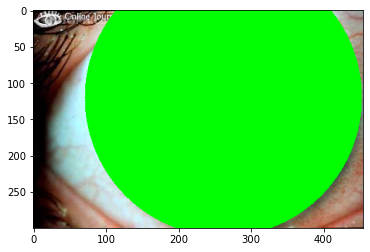

In [170]:
test = draw_circles(circles, rgb_b)

plt.imshow(test)
plt.show()

In [171]:
cv2.imwrite("best_circle.jpg", test)

True

In [172]:
test_cri = cv2.imread('best_circle.jpg')

In [173]:
gray_test_cri = cv2.cvtColor(test_cri, cv2.COLOR_BGR2HSV)

In [174]:
binary = cv2.inRange(gray_test_cri, (0, 255,0), (79, 255, 255))

In [175]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [176]:
contour = max(contours, key=lambda x: cv2.contourArea(x))

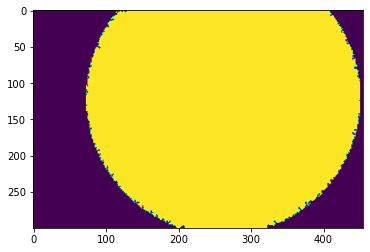

In [177]:
mask = np.zeros_like(binary)
cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
plt.imshow(mask)
plt.show()

In [178]:
cv2.imwrite("mask_test.jpg", mask)

True

In [179]:
img_mask_test = cv2.imread("mask_test.jpg")

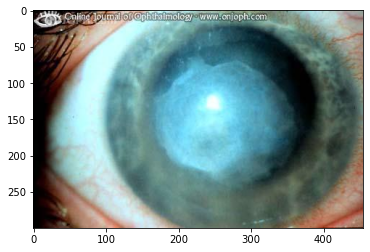

In [180]:
plt.imshow(rgb_b)
plt.show()

In [181]:
crip_f = cv2.bitwise_and(rgb_b, rgb_b, mask=mask)

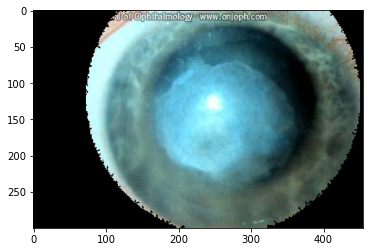

In [182]:
plt.imshow(crip_f)
plt.show()

In [183]:
gray_masked = cv2.cvtColor(crip_f, cv2.COLOR_BGR2GRAY)

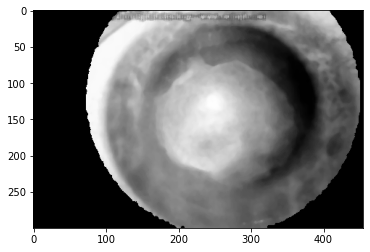

In [184]:
gray_masked_blurred = cv2.medianBlur(gray_masked , 5)
plt.imshow(gray_masked_blurred, cmap='gray', vmin=0, vmax=255)

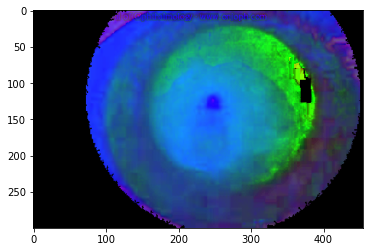

In [185]:
img_hsv = cv2.cvtColor(crip_f, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [186]:
#K-means Clustering to Find Scar Area
#Method 1 - K-means clustering using Scikit

In [187]:
from sklearn.cluster import KMeans

In [188]:
clt = KMeans(n_clusters=3)
clt.fit(img_hsv.reshape(-1, 3))

KMeans(n_clusters=3)

In [189]:
clt.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [190]:
clt.cluster_centers_

array([[2.93980530e+01, 9.87479149e+01, 2.13716914e+02],
       [1.68181818e-01, 2.03046953e-01, 1.27397602e-01],
       [3.84761961e+01, 9.33004005e+01, 1.03367055e+02]])

In [191]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [192]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [193]:
clt_1

KMeans(n_clusters=4)

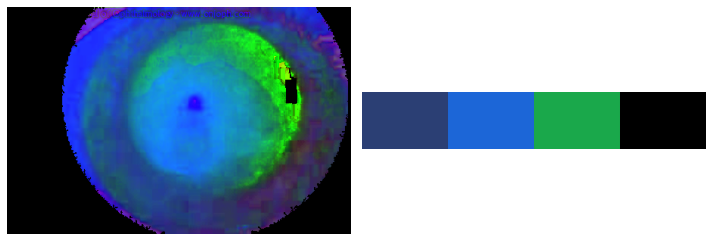

In [194]:
clt = KMeans(n_clusters=4)
clt_1 = clt.fit(img_hsv.reshape(-1, 3))
show_img_compar(img_hsv, palette(clt_1))

In [ ]:
#Method 2 - K-means clustering using CV2

In [222]:
def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img, center

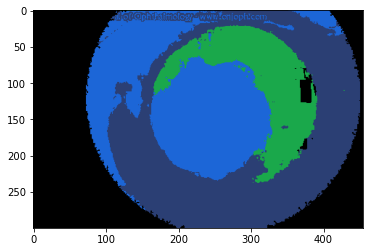

In [223]:
q_img, clt_colors = quantimage(img_hsv,4)
plt.imshow(q_img)
plt.show()

In [224]:
threshold_img = q_img.copy()

In [225]:
threshold_value = clt_colors[3]

In [199]:
threshold_img[q_img == threshold_value] = 255
threshold_img[q_img != threshold_value] = 0

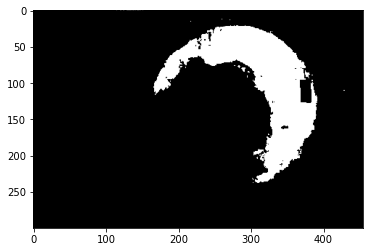

In [200]:
plt.imshow(threshold_img)
plt.show()

In [201]:
threshold_gray = cv2.cvtColor(threshold_img, cv2.COLOR_BGR2GRAY)

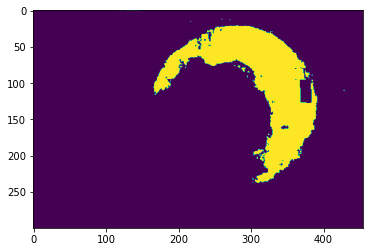

In [202]:
plt.imshow(threshold_gray)
plt.show()

In [203]:
crip_ff = cv2.bitwise_and(crip_f, crip_f, mask=threshold_gray)

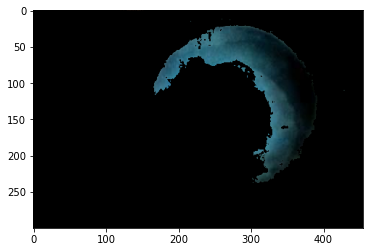

In [204]:
plt.imshow(crip_ff)
plt.show()

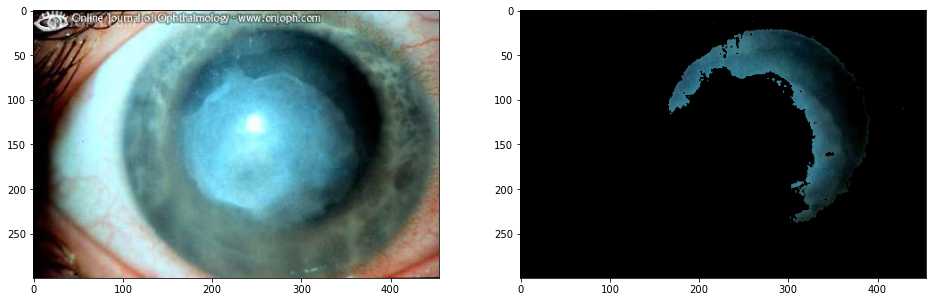

In [205]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 9)
axs[0].imshow(rgb_b)
axs[1].imshow(crip_ff)

In [226]:
threshold_img[q_img == threshold_value] = 0
threshold_img[q_img != threshold_value] = 255

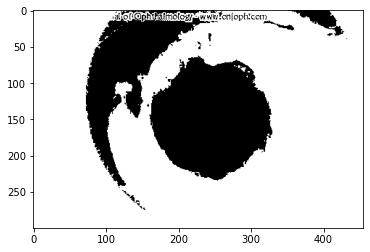

In [227]:
plt.imshow(threshold_img)
plt.show()

In [228]:
threshold_gray = cv2.cvtColor(threshold_img, cv2.COLOR_BGR2GRAY)

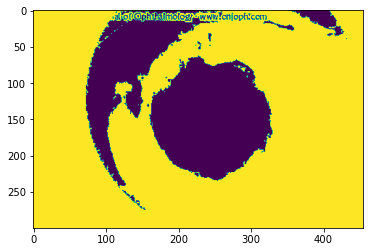

In [229]:
plt.imshow(threshold_gray)
plt.show()

In [230]:
crip_ff = cv2.bitwise_and(crip_f, crip_f, mask=threshold_gray)

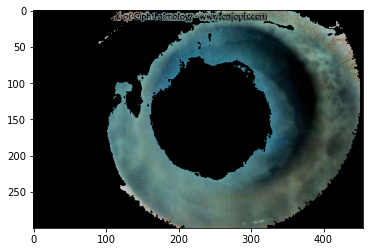

In [231]:
plt.imshow(crip_ff)
plt.show()

In [206]:
circles_n = cv2.HoughCircles(gray_masked_blurred, 
                   cv2.HOUGH_GRADIENT, 1, gray_.shape[0]/64,  param1 = 50,
               param2 = 50, minRadius = 65, maxRadius = 150)
circles_n

NameError: name 'gray_' is not defined

In [207]:
threshold_value = 127

In [208]:
gray_mask_img = cv2.cvtColor(crip_f, cv2.COLOR_BGR2GRAY)

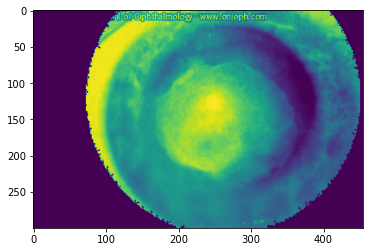

In [209]:
plt.imshow(gray_mask_img)

In [210]:
threshold_img =gray_mask_img.copy()
threshold_img2 =gray_mask_img.copy()

In [211]:
threshold_img[gray_mask_img < threshold_value] = 0
threshold_img[gray_mask_img >= threshold_value] = 255

In [212]:
threshold_img2[gray_mask_img < threshold_value] = 255
threshold_img2[gray_mask_img >= threshold_value] = 0

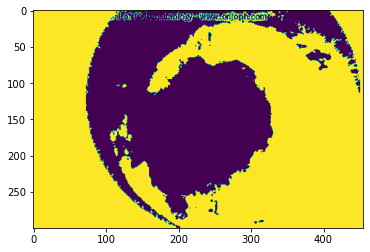

In [213]:
plt.imshow(threshold_img2)
plt.show()

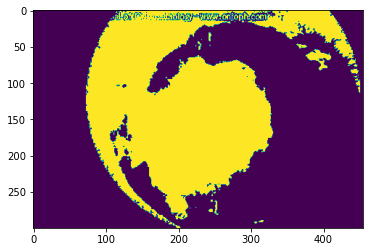

In [214]:
plt.imshow(threshold_img)
plt.show()

In [215]:
crip_ff = cv2.bitwise_and(crip_f, crip_f, mask=threshold_img)

In [216]:
crip_ff2 = cv2.bitwise_and(crip_f, crip_f, mask=threshold_img2)

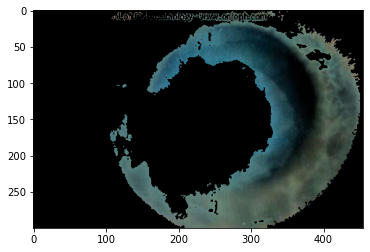

In [217]:
plt.imshow(crip_ff2)
plt.show()

In [218]:
cv2.imwrite("Corneal_scar_d11_bc.jpg",crip_ff2)

True

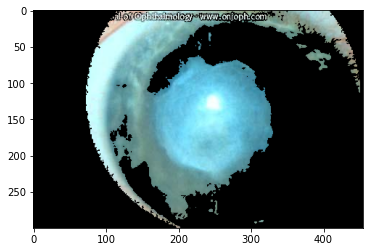

In [219]:
plt.imshow(crip_ff)
plt.show()

In [155]:
cv2.imwrite("Corneal_scar_d11_ac.jpg", crip_ff)

True

In [156]:
img_HSV = cv2.cvtColor(crip_ff, cv2.COLOR_BGR2HSV)
img_HSV = cv2.GaussianBlur(img_HSV, (9, 9), 3)

In [157]:
img_H, img_S, img_V = cv2.split(img_HSV)
_thre, img_flowers = cv2.threshold(img_H, 140, 255, cv2.THRESH_BINARY)
cv2.imwrite('tulips_mask.jpg', img_flowers)

True

In [158]:
blind_img = cv2.imread('corneal_scar_sample_2.jpeg')

In [159]:
rgb_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2RGB)
gray_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2GRAY)
hsv_b = cv2.cvtColor(blind_img, cv2.COLOR_BGR2HSV)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [120]:
img_hsv = cv2.cvtColor(crip_f, cv2.COLOR_BGR2HSV)

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 9)
axs[0].imshow(rgb_b)
axs[1].imshow(gray_b, cmap='gray', vmin=0, vmax=255)
axs[2].imshow(hsv_b, cmap='hsv')

In [145]:
for i in range(0, len(contours)):
    if len(contours[i]) > 0:

        # remove small objects
        if cv2.contourArea(contours[i]) < 500:
            continue

        rect = contours[i]
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 0), 10)

NameError: name 'img' is not defined

In [175]:
cv2.imwrite('cripff_w.jpg', crip_ff)

True

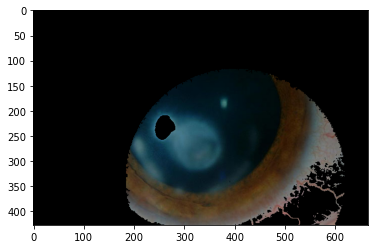

In [176]:
plt.imshow(crip_ff)
plt.show()

In [200]:
img_gray = cv2.cvtColor(crip_f, cv2.COLOR_BGR2GRAY)

In [527]:
img_hsv = cv2.cvtColor(crip_f, cv2.COLOR_BGR2HSV)

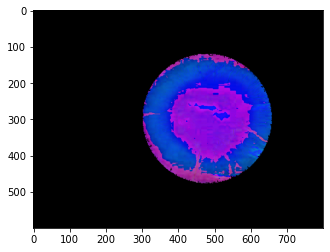

In [528]:
plt.imshow(img_hsv)
plt.show()

In [551]:
binary = cv2.inRange(img_hsv, (0, 0,0), (80, 208, 255))

In [552]:
binaryv2 = cv2.bitwise_not(binary)

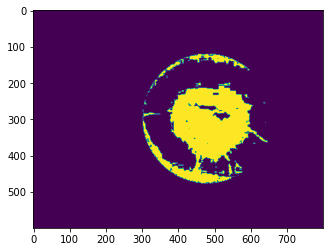

In [562]:
plt.imshow(binaryv2)
plt.show()

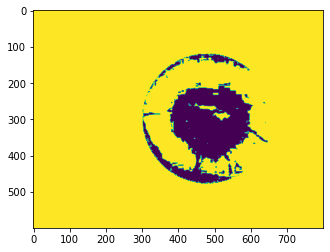

In [563]:
plt.imshow(binary)
plt.show()

In [564]:
crip_ff = cv2.bitwise_and(crip_f, crip_f, mask=binaryv2)

In [565]:
crip_ff2 = cv2.bitwise_and(crip_f, crip_f, mask=binary)

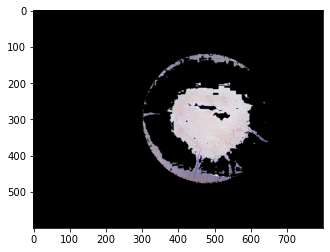

In [566]:
plt.imshow(crip_ff)
plt.show()

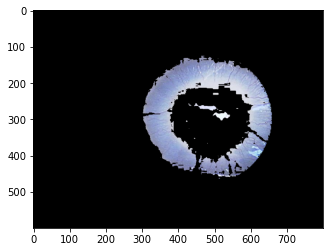

In [567]:
plt.imshow(crip_ff2)
plt.show()

In [568]:
cv2.imwrite("Corneal_scar_d8_bc.jpg",crip_ff2)

True

In [569]:
cv2.imwrite("Corneal_scar_d8_ac.jpg",crip_ff)

True

In [231]:
crip_ff_f = cv2.bitwise_and(crip_ff, crip_ff, mask=binary )

In [258]:
crip_ff_f2 = cv2.bitwise_and(crip_ff, crip_ff, mask=binaryv2 )

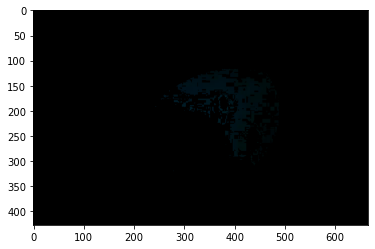

In [232]:
#colour of back ground
plt.imshow(crip_ff_f)
plt.show()

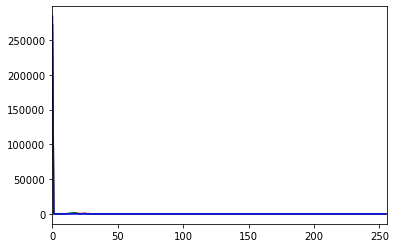

In [260]:
img_1 = cv2.cvtColor(crip_ff_f, cv2.COLOR_BGR2RGB)
colors = ("r", "g", "b")
for i, channel in enumerate(colors):
    histgram = cv2.calcHist([img_1], [i], None, [256], [0, 256])
    plt.plot(histgram, color = channel)
    plt.xlim([0, 256])
plt.show()

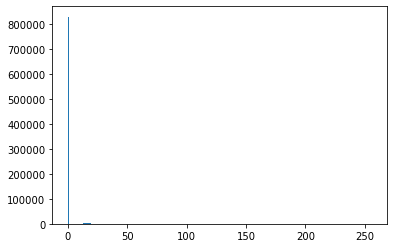

In [262]:
plt.hist(crip_ff_f.ravel(), 256, [0,256])
plt.show()

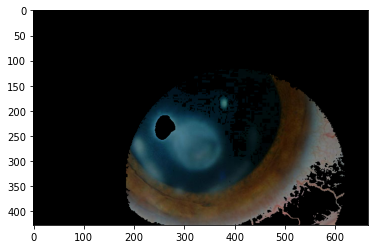

In [259]:
#colour of cornel sc
plt.imshow(crip_ff_f2)
plt.show()

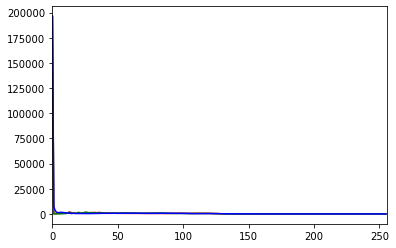

In [261]:
img_1 = cv2.cvtColor(crip_ff_f2, cv2.COLOR_BGR2RGB)
colors = ("r", "g", "b")
for i, channel in enumerate(colors):
    histgram = cv2.calcHist([img_1], [i], None, [256], [0, 256])
    plt.plot(histgram, color = channel)
    plt.xlim([0, 256])
plt.show()

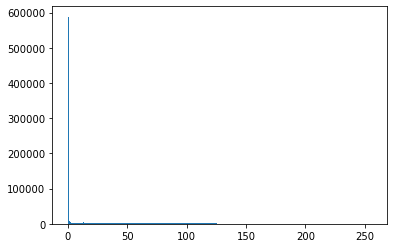

In [263]:
plt.hist(crip_ff_f2.ravel(), 256, [0,256])
plt.show()